In [5]:
import cv2

# 이미지 픽셀값 출력
img = cv2.imread('img/lenna.jpg')
#print(img)
print(img[100,100])


[141 135 212]


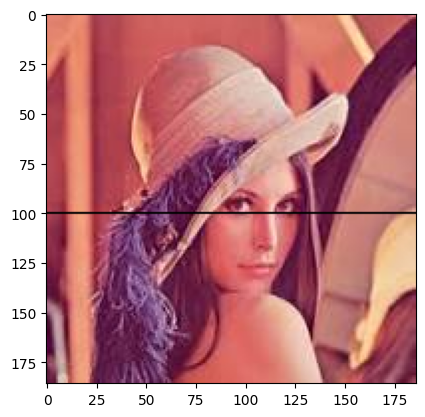

In [8]:
# 픽셀 값 변경
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img/lenna.jpg')
img[100,:,:] = [0,0,0]
b,g,r = cv2.split(img)
new_img =cv2.merge([r,g,b])
plt.imshow(new_img)
plt.show()

In [11]:
import cv2

img = cv2.imread('img/lenna.jpg',cv2.IMREAD_COLOR)
sub_img = img[35:100,50:150]

# 이미지 출력
cv2.imshow('img',sub_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
# 웹캠으로 색상 추척하기
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(frame, frame, mask = mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [17]:
import cv2
import numpy as np

# 크로마키 이미지와 합성할 이미지 읽기
img1 = cv2.imread('img/jerry.jpg')
img2 = cv2.imread('img/space.jpg')

# 이미지 크기 확인
print(img1.shape, img2.shape)

# ROI 선택을 위한 좌표 계산 -> 중심에 위치할 수 있도록 계산
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2 - width1) // 2
y = height2 - height1 - 500  # 이미지를 위쪽으로 100픽셀 이동
w = x + width1
h = y + height1

# 크로마키 배경 이미지에서 크로마키가 있을법한 영역을 10픽셀 정도로 지정
chromakey = img1[:10, :10, :]
offset = 20

# 크로마키 이미지를 HSV로 변환
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

# 크로마키 영역에서 오프셋만큼 여유를 두어서 범위를 지정
chroma_h = hsv_chroma[:, :, 0]  # 크로마키의 h값(초록 or 파랑)
lower = np.array([chroma_h.min() - offset, 100, 100])
upper = np.array([chroma_h.max() + offset, 255, 255])

# 마스크를 생성하고, 마스크를 어플라이
mask = cv2.inRange(hsv_img, lower, upper)  # 제리가 픽셀 0(검은색)
mask_inv = cv2.bitwise_not(mask)  # 배경이 픽셀 0, 제리는 픽셀1
roi = img2[y:h, x:w]  # 배경에서의 ROI
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)  # 제리만 있는 이미지
bg = cv2.bitwise_and(roi, roi, mask=mask)  # 배경만 있는 이미지
img2[y:h, x:w] = fg + bg  # 합성

# 합성된 이미지의 크기를 줄이기
resized_img = cv2.resize(img2, (width2 // 2, height2 // 2))  # 원하는 크기로 조정

# 합성된 이미지 출력
cv2.namedWindow('added img', cv2.WINDOW_NORMAL)
cv2.resizeWindow('added img', width2 // 2, height2 // 2)
cv2.imshow('chromakey', img1)
cv2.imshow('foreground', fg)
cv2.imshow('background', bg)
cv2.imshow('added img', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


(414, 736, 3) (1024, 1024, 3)


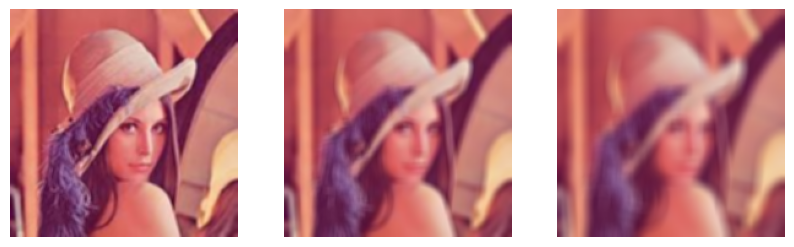

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('img/lenna.jpg')
dst = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))

for i, k in enumerate([3,6,10]):
    kernel = np.ones((k,k))/k**2    
    filtering  = cv2.filter2D(dst,-1,kernel)
    plt.subplot(1,3,i+1)
    plt.imshow(filtering)
    plt.axis('off')
    
plt.show()
    

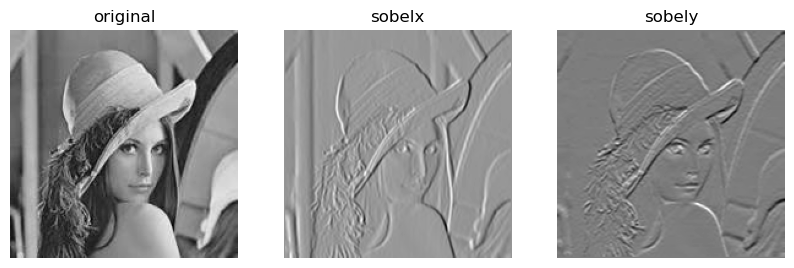

In [20]:
# sobel filter
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/lenna.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobel = cv2.magnitude(sobelx,sobely)
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sobelx,cmap='gray')
plt.title('sobelx')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(sobely,cmap='gray')
plt.title('sobely')
plt.axis('off')
plt.show()
